In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors

# for the bigg models frac TIC_rxns case

In [79]:
# loading the file
ss_tic = pd.read_csv('TICProp_SS_model_Bigg.csv')
ss_tic_rxns = ss_tic.pivot(index="Subsystem", columns="Model", values="Frac_RXNS")
# converting all NaN values to 0
ss_tic_rxns = ss_tic_rxns.fillna(0)
ss_tic_rxns.head()

Model,STM_v1_0,e_coli_core,iAB_RBC_283,iAF1260,iAF692,iAF987,iAPECO1_1312,iB21_1397,iBWG_1329,iCN718,...,iUMNK88_1353,iUTI89_1310,iWFL_1372,iY75_1357,iYL1228,iYO844,iYS1720,iYS854,iZ_1308,ic_1306
Subsystem,,,,,,,,,,,,,,,,,,,,,
4 hydroxyphenylacetate catabolism,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Alanine and aspartate metabolism,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.013158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Alanine, Aspartate, and Glutamate Metabolism",0.038462,0.0,0.0,0.029412,0.0,0.0000,0.016129,0.017544,0.017241,0.000000,...,0.017241,0.017241,0.017544,0.017241,0.050847,0.000000,0.043860,0.000000,0.018182,0.017241
Alternate Carbon Metabolism,0.115385,0.0,0.0,0.147059,0.0,0.0000,0.080645,0.105263,0.086207,0.000000,...,0.086207,0.086207,0.105263,0.086207,0.067797,0.000000,0.078947,0.000000,0.090909,0.086207
Amino Acid Metabolism,0.000000,0.0,0.0,0.000000,0.0,0.0625,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.043478,0.000000,0.000000


In [80]:
# arraging the data based on sum of each rows
ss_tic_rxns['sum'] = ss_tic_rxns.sum(axis=1)
ss_tic_rxns = ss_tic_rxns.sort_values(by='sum', ascending=False)
ss_tic_rxns = ss_tic_rxns.drop(columns='sum')
# sorting the columns based on the organism
model_org = ss_tic[['Model', 'Organism']].drop_duplicates()
order = model_org.sort_values(by='Organism')['Model']
ss_tic_rxns = ss_tic_rxns[order]
ss_tic_rxns =ss_tic_rxns.T
ss_tic_rxns.head()

Subsystem,Transport Outer Membrane Porin,Membrane Lipid Metabolism,Alternate Carbon Metabolism,Glycolysis and Gluconeogenesis,Transport,Purine and Pyrimidine Biosynthesis,Nucleotide Salvage Pathway,Inorganic Ion Transport and Metabolism,Pyruvate Metabolism,Oxidative Phosphorylation,...,S_Histidine_Metabolism,S_Lysine_Metabolism,S_Gluconeogenesis,S_Cysteine_Metabolism,S_Cofactor_and_Prosthetic_Group_Biosynthesis__One_Carbon_pool_by_folate,S_Butanoate_Metabolism,S_Alternate_Carbon,S_Glycine_and_Serine_Metabolism,4 hydroxyphenylacetate catabolism,S_Alternate_Carbon__Propanoate_Metabolism
Model,,,,,,,,,,,,,,,,,,,,,
iCN718,0.000000,0.000000,0.000000,0.000000,0.000000,0.039474,0.000000,0.000000,0.105263,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iYO844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iHN637,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iECBD_1354,0.342105,0.192982,0.105263,0.052632,0.035088,0.026316,0.035088,0.026316,0.026316,0.008772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iEC042_1314,0.339623,0.207547,0.094340,0.056604,0.037736,0.028302,0.037736,0.028302,0.028302,0.009434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# mapping of model to the orgasnisms
model2organism = ss_tic[['Model', 'Organism']].drop_duplicates()
organism = [i.split(' ')[:2] for i in model2organism['Organism']]
model2organism['Organism'] = [' '.join(i) for i in organism]
model2organism

,Model,Organism
0,STM_v1_0,Salmonella enterica
11,e_coli_core,Escherichia coli
12,iAB_RBC_283,Homo sapiens
15,iAF1260,Escherichia coli
30,iAF692,Methanosarcina barkeri
...,...,...
1280,iYO844,Bacillus subtilis
1284,iYS1720,Salmonella pan-reactome
1304,iYS854,Staphylococcus aureus
1312,iZ_1308,Escherichia coli


<ipython-input-143-59d7925d41dc>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=30)


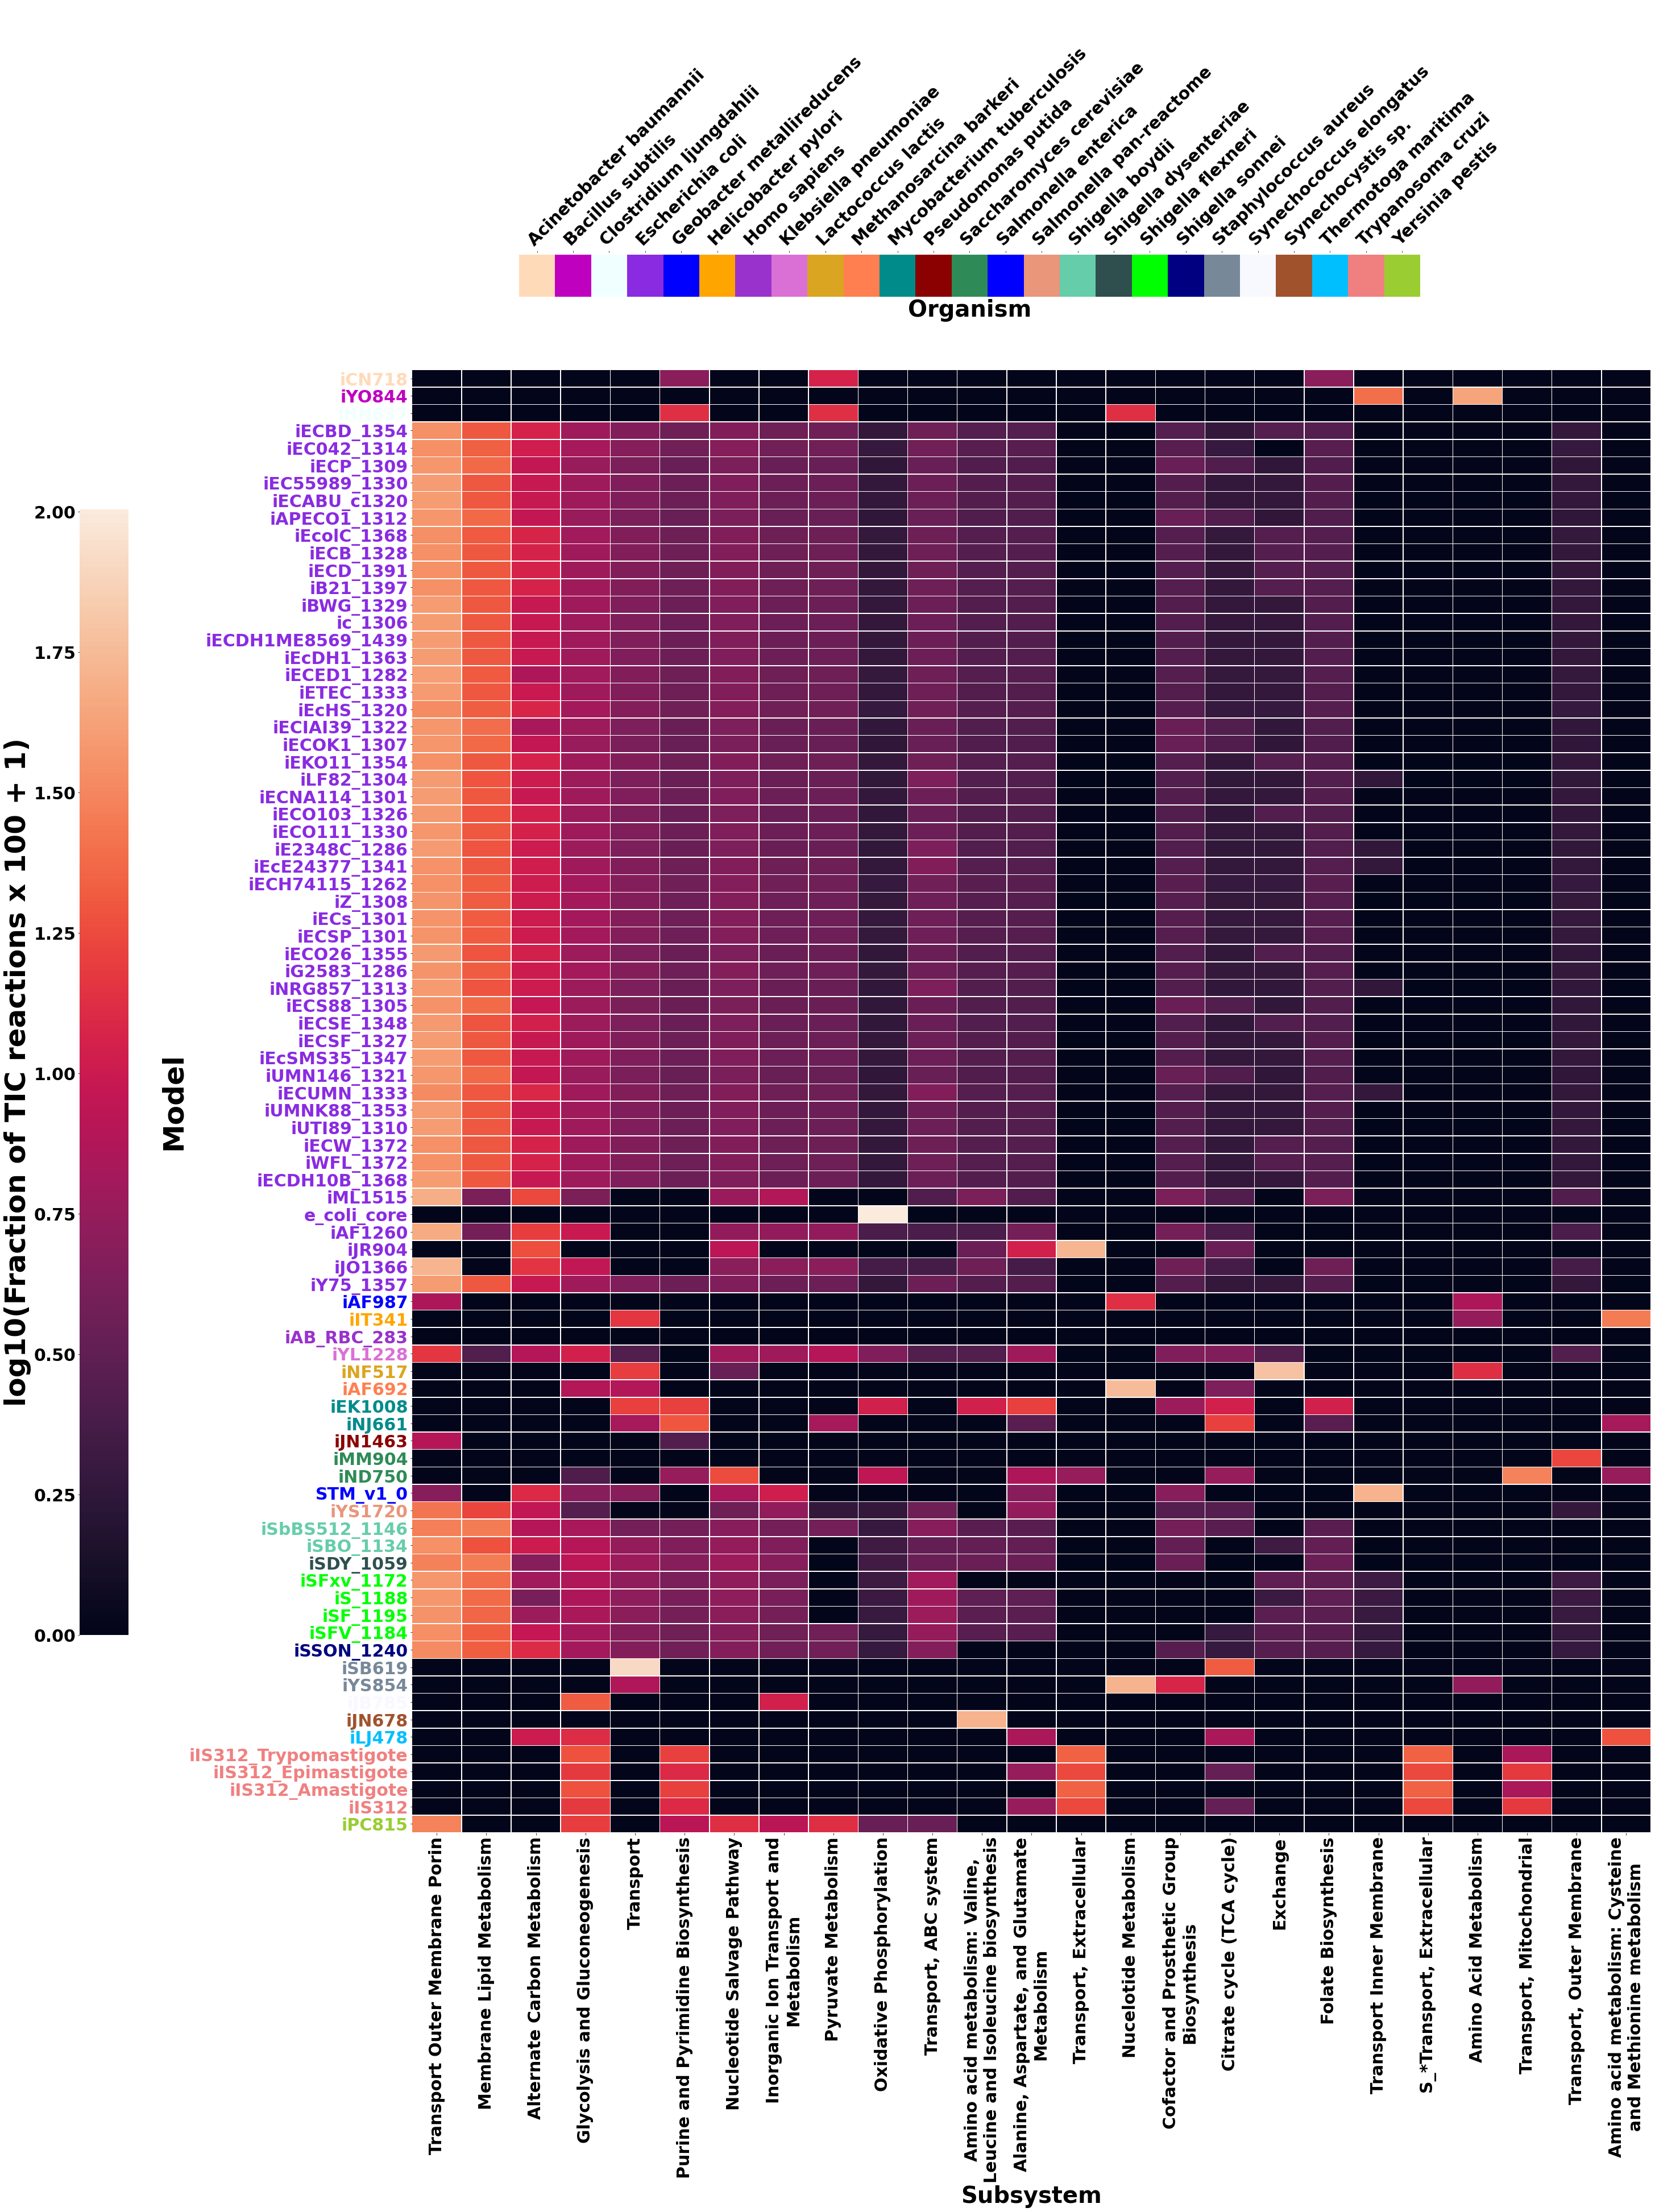

In [ ]:
data = ss_tic_rxns[ss_tic_rxns.columns[:25]]
organism = [model2organism.Organism[model2organism.Model==i].iloc[0] for i in data.index]

# Get all named colors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Select 30 colors (you can adjust the selection)
nColors = np.unique(organism).shape[0]
# randomly select nColors
np.random.seed(18)
selected_colors = np.random.choice(list(colors.keys()), nColors, replace=False)

# mapping the organism to the colors
col = dict(zip(np.unique(organism), selected_colors))
row_colors = list(pd.Series(organism).map(col))
sns.clustermap(np.log10(data*100+1),linewidth=.5,figsize=(40,50),row_cluster=False,
    col_cluster=False,cbar_pos=(-0.01, .2, .03, .55))

# for the heatmap
ax = plt.gcf().axes[2]
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
ax.yaxis.label.set_size(40)
ax.yaxis.label.set_weight('bold')
ax.xaxis.label.set_size(40)
ax.xaxis.label.set_weight('bold')
temp = ax.get_xticklabels()
for t in temp:
    text = t.get_text()
    if len(text.split(' '))>4:
        t.set_text(" ".join(text.split(' ')[:4])+'\n'+" ".join(text.split(' ')[4:]))
ax.set_xticklabels(temp, rotation=90, fontweight='bold', fontsize=30)
tp = ax.get_yticklabels()
for i,t in enumerate(tp):
    t.set_color(row_colors[i])

ax.set_yticklabels(tp, rotation=0, fontweight='bold', fontsize=30)
ax.set_ylabel('Model', fontweight='bold', fontsize=50)

# for the fraction of TIC reations color bar
ax = plt.gcf().axes[3]
ax.yaxis.tick_left()
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=30)
ax.set_ylabel('log10(Fraction of TIC reactions x 100 + 1)', fontweight='bold', fontsize=50)
ax.yaxis.set_label_position('left')

# for the organism color bar
ax = plt.gcf().axes[2].inset_axes([0.05, 1.05, 0.8, 0.03])
ax.set_xlabel('Organism', fontweight='bold', fontsize=40)
for i,(org,color) in enumerate(col.items()):
    ax.bar(i, 1, color=color,width=1)
ax.set_xticks(range(len(col)))
ax.set_xticklabels(col.keys(), rotation=45, fontweight='bold', fontsize=30,ha='left', rotation_mode='anchor')
ax.xaxis.tick_top()
# setting all spines to invisible
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_yticks([])
plt.savefig('Frac_Rxns_in_TIC_Bigg.pdf', bbox_inches='tight', dpi=300)

# for the bigg models frac TIC case

In [146]:
ss_tic_tic = ss_tic.pivot(index="Subsystem", columns="Model", values="Frac_TICs")
# converting all NaN values to 0
ss_tic_tic = ss_tic_tic.fillna(0)

# arraging the data based on sum of each rows
ss_tic_tic['sum'] = ss_tic_tic.sum(axis=1)
ss_tic_tic = ss_tic_tic.sort_values(by='sum', ascending=False)
ss_tic_tic = ss_tic_tic.drop(columns='sum')
# sorting the columns based on the organism
model_org = ss_tic[['Model', 'Organism']].drop_duplicates()
order = model_org.sort_values(by='Organism')['Model']
ss_tic_tic = ss_tic_tic[order]
ss_tic_tic =ss_tic_tic.T
ss_tic_tic.head()

Subsystem,Transport Outer Membrane Porin,Inorganic Ion Transport and Metabolism,Transport,Membrane Lipid Metabolism,Nucleotide Salvage Pathway,Oxidative Phosphorylation,Alternate Carbon Metabolism,"Alanine, Aspartate, and Glutamate Metabolism",Glycolysis and Gluconeogenesis,Purine and Pyrimidine Biosynthesis,...,S_Phenylalanine_Tyrosine_Tryptophan_Biosynthesis,S_Lysine_Metabolism,Purine metabolism (De novo),S_Cofactor_and_Prosthetic_Group_Biosynthesis__One_Carbon_pool_by_folate,S_Cysteine_Metabolism,S_Histidine_Metabolism,Selenoamino acid metabolism,"Valine, leucine and isoleucine biosynthesis","Valine, leucine and isoleucine degradation",PI_transport
Model,,,,,,,,,,,,,,,,,,,,,
iCN718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031134,...,0.0,0.0,0.001668,0.0,0.0,0.0,0.000927,0.000371,0.000371,0.000185
iYO844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
iHN637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
iECBD_1354,0.290780,0.141844,0.106383,0.078014,0.056738,0.035461,0.056738,0.028369,0.021277,0.021277,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
iEC042_1314,0.293233,0.150376,0.112782,0.082707,0.060150,0.037594,0.045113,0.030075,0.022556,0.022556,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


<ipython-input-147-6cc5f88898e8>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=30)


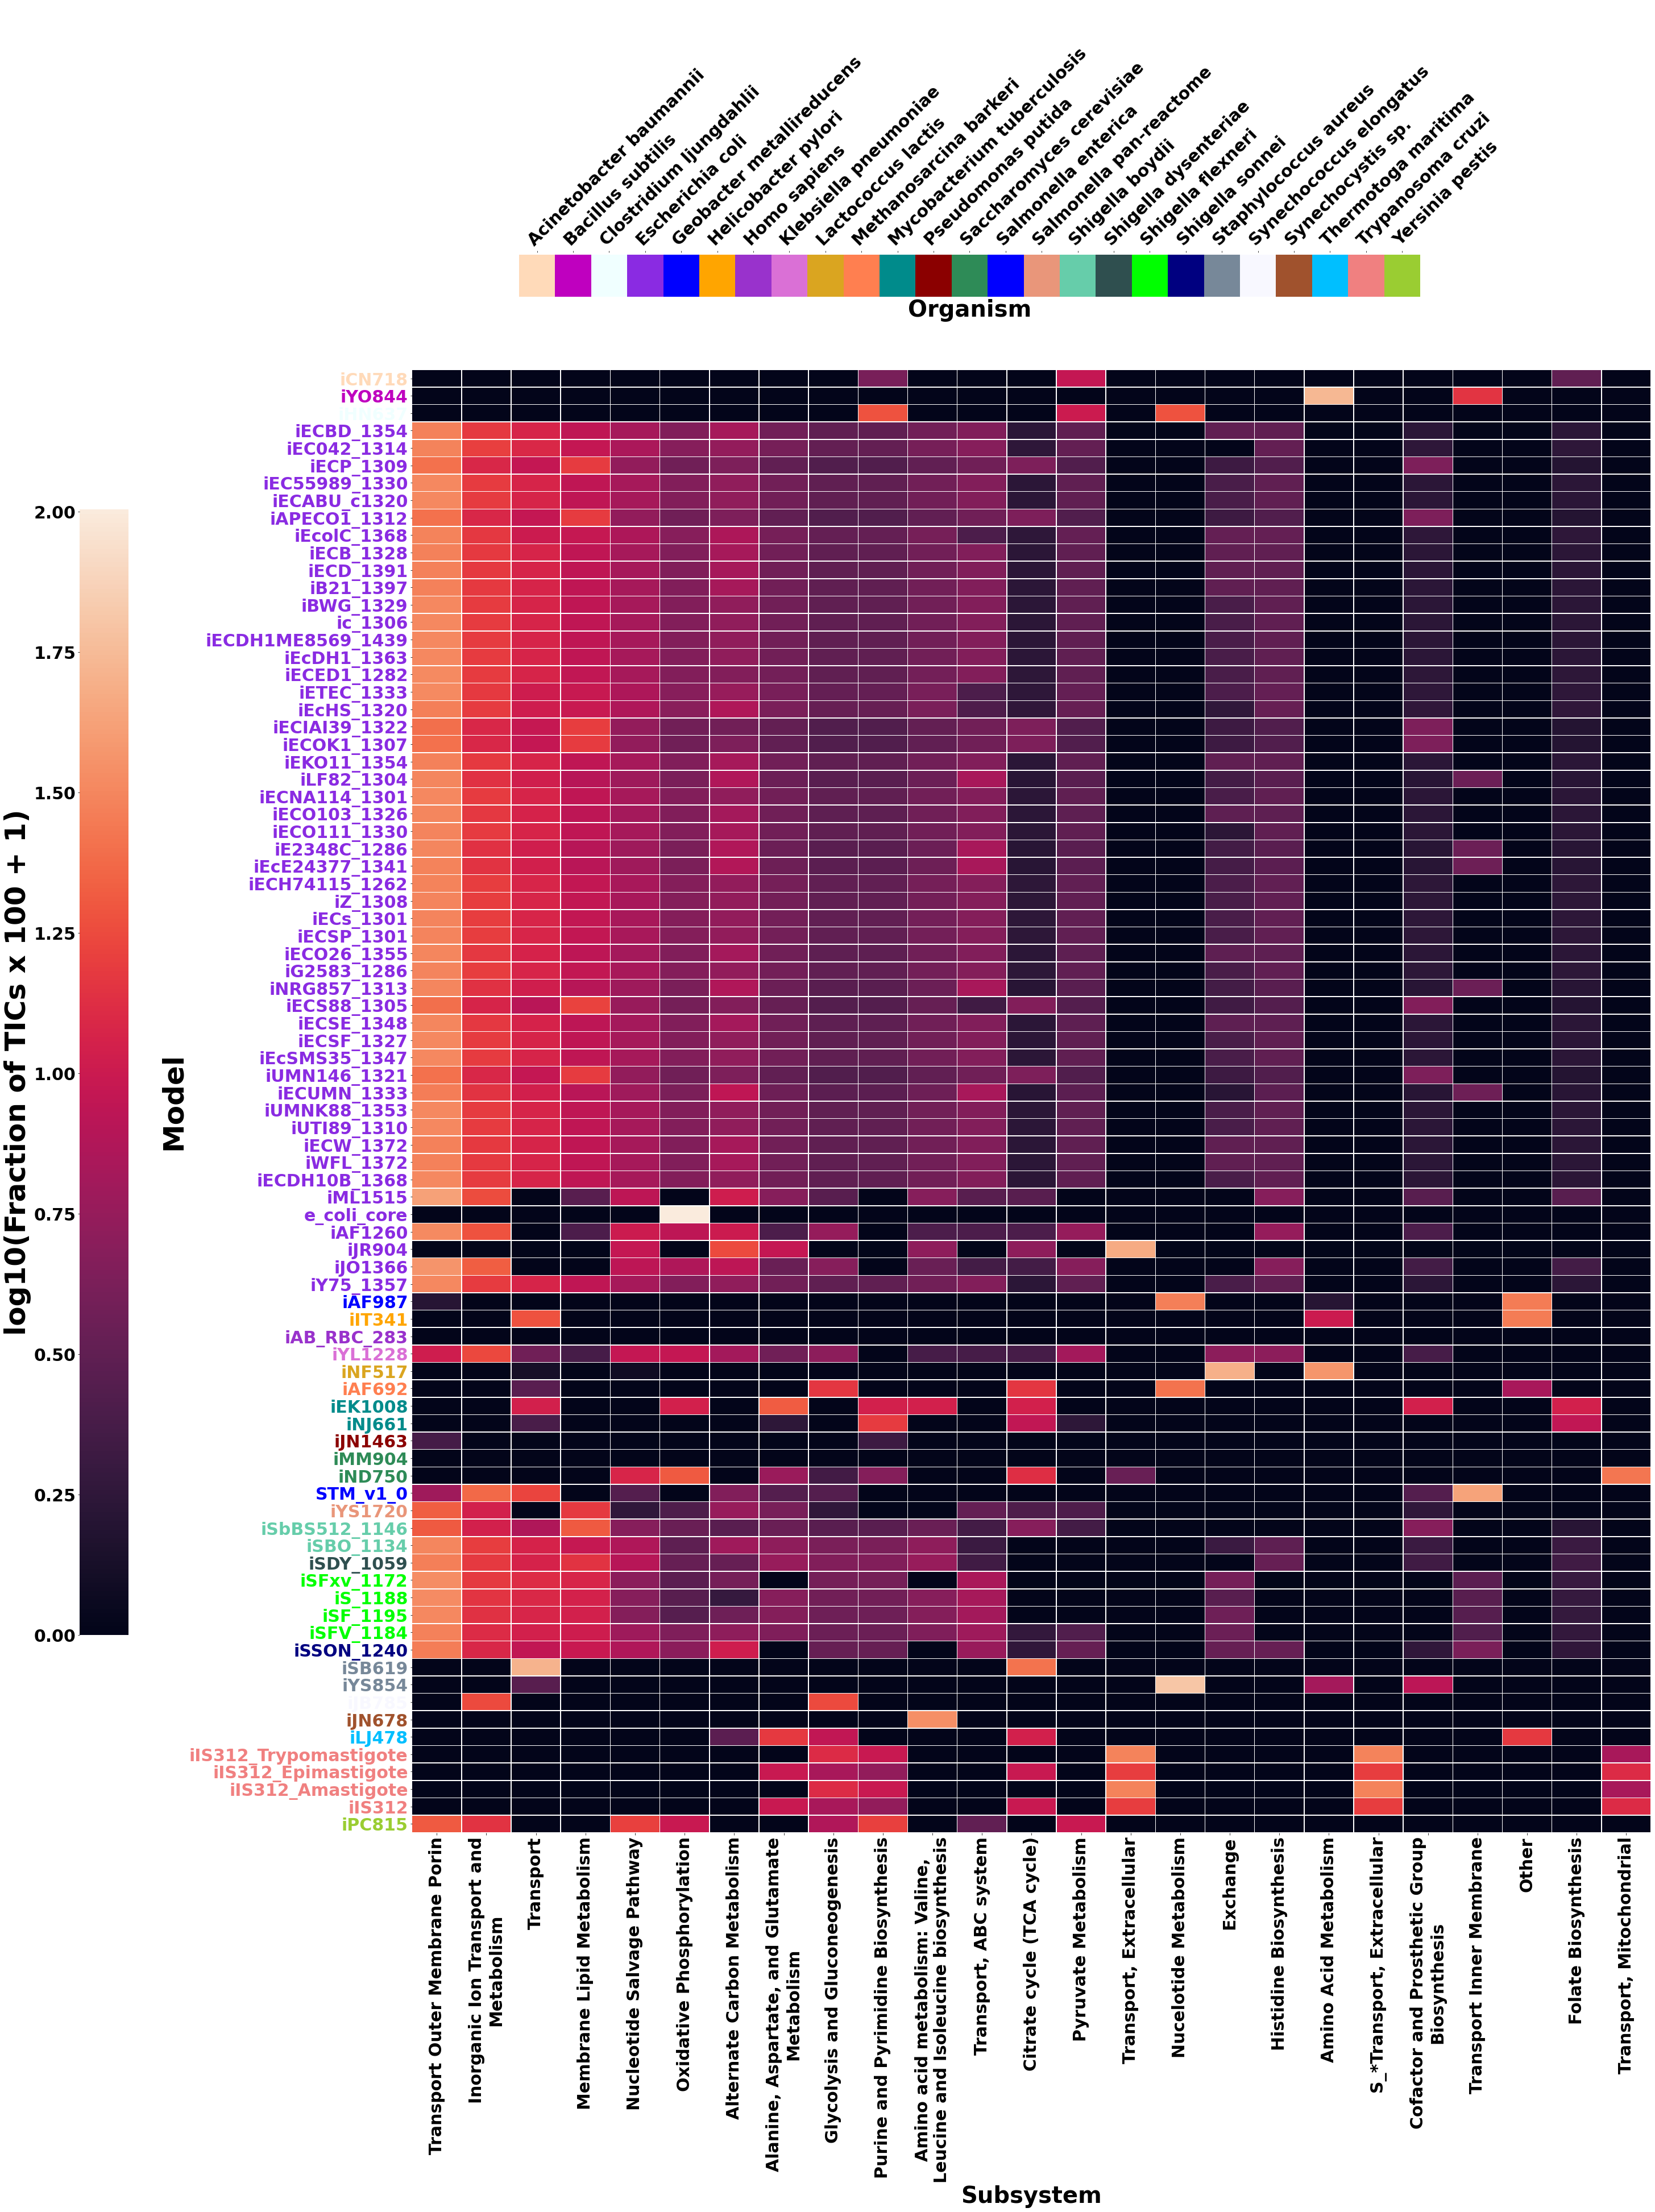

In [ ]:
data = ss_tic_tic[ss_tic_tic.columns[:25]]
organism = [model2organism.Organism[model2organism.Model==i].iloc[0] for i in data.index]

# Get all named colors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Select 30 colors (you can adjust the selection)
nColors = np.unique(organism).shape[0]
# randomly select nColors
np.random.seed(18)
selected_colors = np.random.choice(list(colors.keys()), nColors, replace=False)

# mapping the organism to the colors
col = dict(zip(np.unique(organism), selected_colors))
row_colors = list(pd.Series(organism).map(col))
sns.clustermap(np.log10(data*100+1),linewidth=.5,figsize=(40,50),row_cluster=False,
    col_cluster=False,cbar_pos=(-0.01, .2, .03, .55))

# for the heatmap
ax = plt.gcf().axes[2]
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
ax.yaxis.label.set_size(40)
ax.yaxis.label.set_weight('bold')
ax.xaxis.label.set_size(40)
ax.xaxis.label.set_weight('bold')
temp = ax.get_xticklabels()
for t in temp:
    text = t.get_text()
    if len(text.split(' '))>4:
        t.set_text(" ".join(text.split(' ')[:4])+'\n'+" ".join(text.split(' ')[4:]))
ax.set_xticklabels(temp, rotation=90, fontweight='bold', fontsize=30)
tp = ax.get_yticklabels()
for i,t in enumerate(tp):
    t.set_color(row_colors[i])

ax.set_yticklabels(tp, rotation=0, fontweight='bold', fontsize=30)
ax.set_ylabel('Model', fontweight='bold', fontsize=50)

# for the fraction of TIC reations color bar
ax = plt.gcf().axes[3]
ax.yaxis.tick_left()
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=30)
ax.set_ylabel('log10(Fraction of TICs x 100 + 1)', fontweight='bold', fontsize=50)
ax.yaxis.set_label_position('left')

# for the organism color bar
ax = plt.gcf().axes[2].inset_axes([0.05, 1.05, 0.8, 0.03])
ax.set_xlabel('Organism', fontweight='bold', fontsize=40)
for i,(org,color) in enumerate(col.items()):
    ax.bar(i, 1, color=color,width=1)
ax.set_xticks(range(len(col)))
ax.set_xticklabels(col.keys(), rotation=45, fontweight='bold', fontsize=30,ha='left', rotation_mode='anchor')
ax.xaxis.tick_top()
# setting all spines to invisible
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_yticks([])
plt.savefig('Frac_TICs_Bigg.pdf', bbox_inches='tight', dpi=300)